In [1]:
from scipy.cluster.hierarchy import dendrogram , linkage , fcluster
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [6]:
women_health = pd.read_csv('/content/Women_Health.csv')

# Select features
df_features = women_health[['ID','Gender',
  'Age', 'Medical Charges (k$)', 'Disease Score (1-100)']]

# Standardize features - Select only numeric columns for scaling
numeric_features = ['Age', 'Medical Charges (k$)', 'Disease Score (1-100)']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features[numeric_features])
df_scaled = pd.DataFrame(df_scaled, columns=numeric_features, index=df_features.index) # Keep original index

# If you need 'ID' and 'Gender' in the final DataFrame:
df_scaled = pd.concat([df_features[['ID', 'Gender']], df_scaled], axis=1)

In [7]:
# Transpose so that each row is a feature
df_transposed = df_scaled.transpose()

np.shape(df_transposed)

(5, 200)

In [9]:
# ... (previous code from last response)

# Calculate the correlation matrix
corr_matrix = df_scaled[numeric_features].corr()

# Perform hierarchical clustering on the correlation matrix
linked = linkage(corr_matrix, method='ward', metric='euclidean')

np.shape(linked)

(2, 4)

In [10]:
df_linked = pd.DataFrame(linked, columns=['c1','c2','distance','size'])
df_linked[['c1','c2','size']] = df_linked[['c1','c2','size']].astype('int')

df_linked.head(10)

,c1,c2,distance,size
0,1,2,1.435166,2
1,0,3,1.762056,3


Text(0, 0.5, 'Distance')

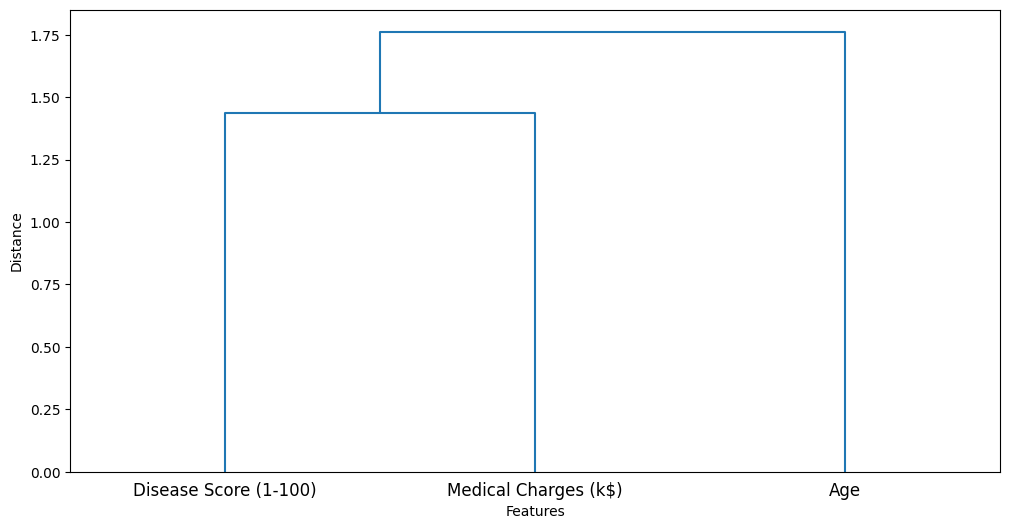

In [12]:
# ... (previous code)

# Create a dendrogram to visualize the feature clustering
plt.figure(figsize=(12, 6))
dendrogram(linked,
            orientation='top',
            labels=corr_matrix.index,  # Use corr_matrix.index for labels
            distance_sort='descending',
            show_leaf_counts=True)

plt.xlabel('Features')
plt.ylabel("Distance")

In [13]:
num_clusters = 10 # Adjust the number of clusters as needed

labels = fcluster(linked, t=num_clusters, criterion='maxclust')

In [15]:
# Find correlation between features and credit score
correlations = []
for col in df_features.columns:
  # Check if 'CREDIT_SCORE' is in women_health and the current column is numeric
  if 'CREDIT_SCORE' in women_health.columns and pd.api.types.is_numeric_dtype(women_health[col]):
    corr = women_health['CREDIT_SCORE'].corr(women_health[col])
    corr = round(corr, 3)
    correlations.append(corr)
  else:
    # Handle cases where 'CREDIT_SCORE' or numeric type is missing
    correlations.append(np.nan)

In [16]:
df_clusters = pd.DataFrame(list(zip(df_features.columns , labels , correlations)),
                          columns=['feature','cluster','corr'])

df_clusters['abs_corr'] = df_clusters['corr'].abs()

df_clusters.sort_values(by=['cluster','abs_corr'], ascending=[True,False], inplace=True)
df_clusters.reset_index(drop=True, inplace=True)
df_clusters.head(10)

,feature,cluster,corr,abs_corr
0,ID,1,NaN,NaN
1,Gender,1,NaN,NaN
2,Age,1,NaN,NaN


In [17]:
c2_features = df_clusters[df_clusters['cluster']==2]['feature'].tolist()
c3_features = df_clusters[df_clusters['cluster']==3]['feature'].tolist()


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


Text(0.5, 1.0, 'Cluster 2 and 3')

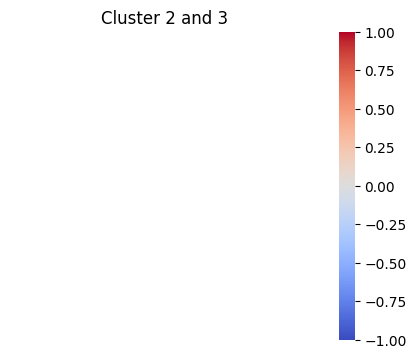

In [21]:
c2_features = df_clusters[df_clusters['cluster']==2]['feature'].tolist()
c3_features = df_clusters[df_clusters['cluster']==3]['feature'].tolist()

# Plot correlations for features in clusters 2 and 3
# Ensure all features are in df_features
all_features = c2_features + c3_features  # Concatenate lists
corr = df_features[all_features].corr()

# plot correlation matrix
plt.figure(figsize=(5, 4))
sns.heatmap(corr,
            annot=True,
            cmap='coolwarm',
            linewidths=0.5,
            fmt=".1f",
            annot_kws={"size": 5},
            vmin=-1, vmax=1)
plt.title('Cluster 2 and 3')